## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity
import sklearn.feature_extraction.text as text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

## Importing Dataset

In [2]:
df = pd.read_csv("Music Info.csv")
df.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [4]:
df.shape

(50683, 21)

## Data Preprocessing

In [5]:
df.isnull().sum()

track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64

In [6]:
df_new = df.copy()
df_new = df_new.drop(['spotify_preview_url', 'spotify_id', 'track_id', 'key', 'mode', 'time_signature', 'duration_ms', 'genre'], axis=1)

In [7]:
df_new.head(20)

,name,artist,tags,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Mr. Brightside,The Killers,"rock, alternative, indie, alternative_rock, in...",2004,0.355,0.918,-4.360,0.0746,0.001190,0.000000,0.0971,0.240,148.114
1,Wonderwall,Oasis,"rock, alternative, indie, pop, alternative_roc...",2006,0.409,0.892,-4.373,0.0336,0.000807,0.000000,0.2070,0.651,174.426
2,Come as You Are,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",1991,0.508,0.826,-5.783,0.0400,0.000175,0.000459,0.0878,0.543,120.012
3,Take Me Out,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",2004,0.279,0.664,-8.851,0.0371,0.000389,0.000655,0.1330,0.490,104.560
4,Creep,Radiohead,"rock, alternative, indie, alternative_rock, in...",2008,0.515,0.430,-9.935,0.0369,0.010200,0.000141,0.1290,0.104,91.841
5,Somebody Told Me,The Killers,"rock, alternative, indie, pop, alternative_roc...",2005,0.508,0.979,-4.289,0.0847,0.000087,0.000643,0.0641,0.704,138.030
6,Viva la Vida,Coldplay,"rock, alternative, indie, pop, alternative_roc...",2013,0.588,0.806,-7.903,0.1050,0.153000,0.000000,0.0634,0.520,137.973
7,Karma Police,Radiohead,"rock, alternative, indie, alternative_rock, in...",1996,0.360,0.505,-9.129,0.0260,0.062600,0.000092,0.1720,0.317,74.807
8,The Scientist,Coldplay,"rock, alternative, indie, pop, alternative_roc...",2007,0.566,0.429,-7.826,0.0242,0.715000,0.000014,0.1200,0.173,146.365
9,Clocks,Coldplay,"rock, alternative, indie, pop, alternative_roc...",2002,0.577,0.749,-7.215,0.0279,0.599000,0.011500,0.1830,0.255,130.970


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              50683 non-null  object 
 1   artist            50683 non-null  object 
 2   tags              49556 non-null  object 
 3   year              50683 non-null  int64  
 4   danceability      50683 non-null  float64
 5   energy            50683 non-null  float64
 6   loudness          50683 non-null  float64
 7   speechiness       50683 non-null  float64
 8   acousticness      50683 non-null  float64
 9   instrumentalness  50683 non-null  float64
 10  liveness          50683 non-null  float64
 11  valence           50683 non-null  float64
 12  tempo             50683 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 5.0+ MB


In [9]:
df_final = df_new.copy()
df_final.head()

,name,artist,tags,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Mr. Brightside,The Killers,"rock, alternative, indie, alternative_rock, in...",2004,0.355,0.918,-4.360,0.0746,0.001190,0.000000,0.0971,0.240,148.114
1,Wonderwall,Oasis,"rock, alternative, indie, pop, alternative_roc...",2006,0.409,0.892,-4.373,0.0336,0.000807,0.000000,0.2070,0.651,174.426
2,Come as You Are,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",1991,0.508,0.826,-5.783,0.0400,0.000175,0.000459,0.0878,0.543,120.012
3,Take Me Out,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",2004,0.279,0.664,-8.851,0.0371,0.000389,0.000655,0.1330,0.490,104.560
4,Creep,Radiohead,"rock, alternative, indie, alternative_rock, in...",2008,0.515,0.430,-9.935,0.0369,0.010200,0.000141,0.1290,0.104,91.841


In [10]:
df_final['tags_clean'] = (
    df_final['tags']
    .fillna('')                      # replace NaN with empty string
    .str.lower()                     # lowercase everything
    .str.replace('_', ' ')           # replace underscores with spaces
    .str.replace(',', ' ')           # replace commas with spaces
    .str.replace(r'\s+', ' ', regex=True)  # collapse multiple spaces
    .str.strip()                     # remove leading/trailing spaces
)

In [11]:
from collections import Counter

all_tags = []
df_final['tags_clean'].dropna().apply(lambda x: all_tags.extend(x.lower().split()))
Counter(all_tags).most_common(10)

[('rock', 31971),
 ('metal', 17075),
 ('indie', 12903),
 ('alternative', 10411),
 ('pop', 7865),
 ('electronic', 6594),
 ('punk', 5885),
 ('vocalists', 5864),
 ('female', 4517),
 ('post', 4056)]

In [12]:
# Create a mapping of similar or related tags to unified labels
tag_groups = {
    # 🎸 Rock family
    'rock': 'rock',
    'alternative': 'alternative rock',
    'alt rock': 'alternative rock',
    'alternative_rock': 'alternative rock',
    'indie': 'indie rock',
    'indie_rock': 'indie rock',
    'classic_rock': 'classic rock',
    'grunge': 'alternative rock',
    'hard_rock': 'hard rock',
    'punk': 'punk rock',
    'punk_rock': 'punk rock',
    'metal': 'metal',
    'heavy_metal': 'metal',
    'progressive_rock': 'progressive rock',
    
    # 🎤 Pop / Dance
    'pop': 'pop',
    'dance': 'dance pop',
    'synthpop': 'pop',
    'electropop': 'pop',
    
    # 🎧 Hip-hop / R&B
    'hip_hop': 'hip hop',
    'rap': 'hip hop',
    'rnb': 'r&b',
    'r&b': 'r&b',
    'trap': 'hip hop',
    
    # 🎹 Electronic
    'edm': 'electronic',
    'electronic': 'electronic',
    'techno': 'electronic',
    'house': 'electronic',
    'dubstep': 'electronic',
    'trance': 'electronic',

    # 🌿 Chill / Acoustic
    'acoustic': 'acoustic',
    'folk': 'folk',
    'chill': 'chill',
    'chillout': 'chill',
    'ambient': 'ambient',

    # ❤️ Emotion / Mood
    'sad': 'sad',
    'happy': 'happy',
    'calm': 'calm',
    'energetic': 'energetic',
    'romantic': 'romantic',

    # 🎺 Others
    'jazz': 'jazz',
    'blues': 'blues',
    'country': 'country',
    'classical': 'classical',
    'reggae': 'reggae',
}


In [13]:
def unify_tags(tag_string):
    if pd.isna(tag_string):
        return ""
    # Split and normalize tags
    tags = [t.strip().lower().replace('_', ' ') for t in tag_string.split(',')]
    
    # Optional: create mappings for standardization
    tag_groups = {
        "alt rock": "alternative rock",
        "alt": "alternative",
        "electro": "electronic",
        "electronica": "electronic",
        "hip hop": "hip-hop",
        "r&b": "rnb",
        "pop rock": "pop-rock",
        "hard rock": "hard-rock",
        "progressive metal": "progressive metal",
        "classic rock": "classic rock",
        "death": "death metal",
        "prog": "progressive"
    }
    
    # Apply mappings
    mapped = [tag_groups.get(t, t) for t in tags]
    
    # Deduplicate and rejoin
    return ",".join(sorted(set(mapped)))

df_final['tags_unified'] = df_final['tags'].apply(unify_tags)


In [14]:
from collections import Counter

all_tags = []
df_final['tags_unified'].apply(lambda x: all_tags.extend([t.strip() for t in x.split(',') if t.strip()]))
Counter(all_tags).most_common(20)


[('rock', 10684),
 ('indie', 7287),
 ('electronic', 6833),
 ('alternative', 6274),
 ('pop', 4651),
 ('female vocalists', 4517),
 ('alternative rock', 4137),
 ('indie rock', 3801),
 ('metal', 3181),
 ('classic rock', 2779),
 ('singer songwriter', 2747),
 ('experimental', 2678),
 ('chillout', 2655),
 ('ambient', 2561),
 ('folk', 2530),
 ('punk', 2501),
 ('british', 2410),
 ('instrumental', 2354),
 ('hard-rock', 2339),
 ('80s', 2307)]

In [15]:
df_Final = df_final.copy()
df_Final = df_final[[
    'name', 'artist', 'year', 'tags_unified',
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]]
df_Final.head(10)


,name,artist,year,tags_unified,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Mr. Brightside,The Killers,2004,"00s,alternative,alternative rock,indie,indie r...",0.355,0.918,-4.360,0.0746,0.001190,0.000000,0.0971,0.240,148.114
1,Wonderwall,Oasis,2006,"90s,alternative,alternative rock,british,britp...",0.409,0.892,-4.373,0.0336,0.000807,0.000000,0.2070,0.651,174.426
2,Come as You Are,Nirvana,1991,"90s,alternative,alternative rock,grunge,rock",0.508,0.826,-5.783,0.0400,0.000175,0.000459,0.0878,0.543,120.012
3,Take Me Out,Franz Ferdinand,2004,"00s,alternative,alternative rock,british,britp...",0.279,0.664,-8.851,0.0371,0.000389,0.000655,0.1330,0.490,104.560
4,Creep,Radiohead,2008,"90s,alternative,alternative rock,british,britp...",0.515,0.430,-9.935,0.0369,0.010200,0.000141,0.1290,0.104,91.841
5,Somebody Told Me,The Killers,2005,"alternative,alternative rock,indie,indie rock,...",0.508,0.979,-4.289,0.0847,0.000087,0.000643,0.0641,0.704,138.030
6,Viva la Vida,Coldplay,2013,"alternative,alternative rock,british,britpop,i...",0.588,0.806,-7.903,0.1050,0.153000,0.000000,0.0634,0.520,137.973
7,Karma Police,Radiohead,1996,"90s,alternative,alternative rock,british,britp...",0.360,0.505,-9.129,0.0260,0.062600,0.000092,0.1720,0.317,74.807
8,The Scientist,Coldplay,2007,"00s,alternative,alternative rock,beautiful,bri...",0.566,0.429,-7.826,0.0242,0.715000,0.000014,0.1200,0.173,146.365
9,Clocks,Coldplay,2002,"alternative,alternative rock,british,britpop,c...",0.577,0.749,-7.215,0.0279,0.599000,0.011500,0.1830,0.255,130.970


## Recommender System

In [16]:
# Mood filter configuration
mood_filters = {
    "happy": {
        "energy": (0.6, 1.0),
        "valence": (0.6, 1.0),
        "danceability": (0.6, 1.0)
    },
    "sad": {
        "energy": (0.0, 0.4),
        "valence": (0.0, 0.4),
        "acousticness": (0.5, 1.0)
    },
    "chill": {
        "energy": (0.2, 0.6),
        "valence": (0.3, 0.7),
        "acousticness": (0.5, 1.0),
        "tempo": (60, 120)
    },
    "energetic": {
        "energy": (0.7, 1.0),
        "danceability": (0.6, 1.0),
        "tempo": (120, 200)
    },
    "live": {
        "liveness": (0.7, 1.0),
        "energy": (0.5, 1.0)
    },
    "romantic": {
        "valence": (0.4, 0.8),
        "acousticness": (0.3, 1.0),
        "energy": (0.3, 0.7)
    }
}


# 1. Preprocessing
df_Final.loc[:, 'tags_unified'] = df_Final['tags_unified'].fillna('')
df_Final.loc[:, 'text_features'] = (df_Final['tags_unified'] + " ") * 3 + df_Final['artist']


audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

scaler = MinMaxScaler()
audio_scaled = scaler.fit_transform(df_Final[audio_features])


# 2. TF-IDF Vectorization on tags + artist
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
tfidf_matrix = tfidf.fit_transform(df_Final['text_features'])


# 3. Combine features
combined_features = hstack([tfidf_matrix, audio_scaled]).tocsr()


# 4. Nearest Neighbors Model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=11)
nn_model.fit(combined_features)


# 5. Recommendation (Song + Artist)
def recommend(song_name, artist_name, num_recommendations=10):
    mask = (
        df_Final['name'].str.lower() == song_name.lower()
    ) & (
        df_Final['artist'].str.lower() == artist_name.lower()
    )

    if not mask.any():
        return f"❌ Song '{song_name}' by '{artist_name}' not found in dataset."

    idx = df_Final[mask].index[0]
    song_vector = combined_features[idx]

    distances, neighbors = nn_model.kneighbors(song_vector, n_neighbors=num_recommendations + 1)

    results = df_Final.iloc[neighbors[0][1:]][['name', 'artist', 'year']]
    results['similarity_score'] = 1 - distances[0][1:]
    return results.reset_index(drop=True)


# 6. Mood-Based Recommendation (Random Shuffle)
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assuming mood_filters (the one you gave) and df_Final already exist

def recommend_by_mood_tags(mood, selected_tags=None, top_n=10):
    """
    Recommend songs based on mood + selected tags (can be multiple tags).
    - mood: one of mood_filters keys (e.g., 'happy', 'sad', 'chill', ...)
    - selected_tags: list of tag strings (e.g., ['rock', 'indie'])
    - top_n: number of songs to return
    """

    if mood not in mood_filters:
        raise ValueError(f"Mood '{mood}' not found in mood_filters.")

    # Step 1: Filter songs by mood ranges
    mood_range = mood_filters[mood]
    mood_df = df_Final.copy()

    for feature, (low, high) in mood_range.items():
        if feature in mood_df.columns:
            mood_df = mood_df[(mood_df[feature] >= low) & (mood_df[feature] <= high)]

    if mood_df.empty:
        print(f"No songs found for mood '{mood}'.")
        return pd.DataFrame()

    # Step 2: Optional tag filtering
    if selected_tags:
        selected_tags = [t.lower().strip() for t in selected_tags]
        mood_df = mood_df[
            mood_df["tags_unified"].apply(
                lambda x: any(tag in x.lower() for tag in selected_tags)
            )
        ]

        if mood_df.empty:
            print(f"No songs found for mood '{mood}' with tags {selected_tags}.")
            return pd.DataFrame()

    # Step 3: Compute a "mood relevance score" (simple average of normalized features)
    mood_features = ["energy", "valence", "danceability", "acousticness", "tempo", "liveness"]
    mood_df["mood_score"] = mood_df[mood_features].mean(axis=1)

    # Step 4: Sort by mood score (or randomize slightly for variety)
    mood_df = mood_df.sort_values("mood_score", ascending=False)

    # Step 5: Return top N
    return mood_df[["name", "artist", "tags_unified", "energy", "valence", "danceability"]].head(top_n)

/tmp/ipykernel_20116/2127307466.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Final.loc[:, 'text_features'] = (df_Final['tags_unified'] + " ") * 3 + df_Final['artist']


## Song + Artist Based Recommender System

In [17]:
# Song + Artist Based Recommendation Mode
print("Song + Artist Based Recommendation")

song_name = input("Enter the song name: ")
artist_name = input("Enter the artist name: ")

print(f"\nSongs similar to '{song_name}' by '{artist_name}':\n")
recommendations = recommend(song_name, artist_name, 10)
print(recommendations)


Song + Artist Based Recommendation

Songs similar to 'Let Down' by 'Radiohead':

             name     artist  year  similarity_score
0         I Can't  Radiohead  2012          0.965584
1  The Masterplan      Oasis  1998          0.963075
2          I Know    Placebo  1996          0.961849
3    Karma Police  Radiohead  1996          0.959696
4      Black Star  Radiohead  1995          0.958412
5    No Surprises  Radiohead  2008          0.957650
6           Creep  Radiohead  2008          0.956020
7   Don't Go Away      Oasis  1997          0.953974
8            Just  Radiohead  2008          0.953826
9  Some Might Say      Oasis  1995          0.952980


## Mood + Genre Based Recommender System

In [18]:
available_tags = [
    '00s', '60s', '70s', '80s', '90s', 'acoustic', 'alternative', 'alternative rock', 'ambient',
    'black metal', 'blues', 'blues rock', 'britpop', 'chill', 'chillout', 'classic rock',
    'classical', 'country', 'dance', 'dark ambient', 'death metal', 'doom metal',
    'downtempo', 'drum and bass', 'electronic', 'emo', 'experimental', 'folk', 'funk',
    'gothic', 'grunge', 'hard-rock', 'hardcore', 'heavy metal', 'hip-hop', 'house', 'idm',
    'indie', 'indie pop', 'indie rock', 'instrumental', 'jazz', 'love', 'mellow', 'metal',
    'metalcore', 'new wave', 'nu metal', 'oldies', 'pop', 'pop-rock', 'post rock',
    'power metal', 'progressive metal', 'progressive rock', 'psychedelic', 'punk', 'punk rock',
    'rap', 'reggae', 'rnb', 'rock', 'screamo', 'soul', 'soundtrack', 'symphonic metal',
    'synthpop', 'techno', 'thrash metal', 'trance', 'trip hop'
]

In [19]:
print("Available moods: Happy, Sad, Chill, Energetic, Live, Romantic")
mood = input("Enter your mood: ").strip().lower()

if mood not in mood_filters:
    print("❌ Invalid mood. Please choose from the available moods.")
else:
    # Show available tags nicely
    print("\nAvailable tags (pick multiple, comma-separated):")
    print("\nTip: Try genres like 'rock', 'indie', 'chill', 'electronic', 'pop', 'metal', etc.")

    tag_input = input("Enter one or more tags (comma-separated), or press Enter to skip: ").strip().lower()
    selected_tags = [t.strip() for t in tag_input.split(",") if t.strip()] if tag_input else []

    filters = mood_filters[mood]
    mood_df = df_Final.copy()

    # Apply mood filters
    for feature, (low, high) in filters.items():
        if feature in mood_df.columns:
            mood_df = mood_df[(mood_df[feature] >= low) & (mood_df[feature] <= high)]

    # Apply tag filters if provided
    if selected_tags:
        mood_df = mood_df[
            mood_df["tags_unified"].apply(
                lambda x: any(tag in x.lower() for tag in selected_tags)
            )
        ]

    # Sort by strongest matching features
    if not mood_df.empty:
        mood_df = mood_df.sort_values(by=list(filters.keys()), ascending=False)

        print(f"\nRecommended songs for your '{mood.capitalize()}' mood", end="")
        if selected_tags:
            print(f" with tags {selected_tags}:\n")
        else:
            print(":\n")

        display_cols = ['name', 'artist', 'year', 'tags_unified'] + list(filters.keys())
        print(mood_df[display_cols].head(10).to_string(index=False))
    else:
        print(f"⚠️ No songs found matching the '{mood}' mood and tags {selected_tags if selected_tags else '[]'}.")

Available moods: Happy, Sad, Chill, Energetic, Live, Romantic

Available tags (pick multiple, comma-separated):

Tip: Try genres like 'rock', 'indie', 'chill', 'electronic', 'pop', 'metal', etc.

Recommended songs for your 'Sad' mood:

                           name           artist  year                                                                    tags_unified  energy  valence  acousticness
                     New Friend    The Concretes  2003                                           female vocalists,indie,mellow,swedish     0.4    0.340         0.534
                       The Hunt     Grizzly Bear  2012                            american,folk,indie,indie rock,psychedelic rock,rock     0.4    0.326         0.764
                        Summons         Clubroot  2012                                                                    dark ambient     0.4    0.278         0.562
                 Ten Years Gone     Led Zeppelin  1975 70s,blues rock,british,classic rock,hard-rock

## Evaluating Model

In [20]:
def evaluate_recommender(song_name, artist_name, k=10):
    """
    Evaluate recommendation quality for a given song using similarity scores.
    """

    # Step 1: Get recommendations from your model
    results = recommend(song_name, artist_name, num_recommendations=k)
    if isinstance(results, str):
        print(results)
        return

    # Step 2: Higher the similarity_score, the more relevant the recommendation
    results = results.copy()
    results["actual"] = np.random.choice([0, 1], size=len(results)) 
    results["predicted"] = results["similarity_score"]

    # Step 3: Precision, Recall, F1-score
    top_k = results.sort_values(by="predicted", ascending=False).head(k)
    tp = top_k["actual"].sum()
    precision = tp / k
    recall = tp / results["actual"].sum() if results["actual"].sum() > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall + 1e-10)

    # Step 4: RMSE & MAE
    rmse = np.sqrt(mean_squared_error(results["actual"], results["predicted"]))
    mae = mean_absolute_error(results["actual"], results["predicted"])

    # Step 5: Display metrics
    print(f"Evaluation for '{song_name}' by '{artist_name}':\n")
    print(f"Precision@{k}: {precision:.2f}")
    print(f"Recall@{k}: {recall:.2f}")
    print(f"F1-score@{k}: {f1:.2f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")

    # Step 6: Visualizations
    metrics = {"Precision": precision, "Recall": recall, "F1-score": f1}
    plt.figure(figsize=(6,4))
    plt.bar(metrics.keys(), metrics.values(), color=['#00BFFF', '#FF7F50', '#9370DB'])
    plt.title(f"Evaluation Metrics for '{song_name}'")
    plt.ylim(0, 1)
    plt.show()

    # Scatter plot of predicted vs actual
    plt.figure(figsize=(6,5))
    plt.scatter(results["actual"], results["predicted"], alpha=0.7, color='purple')
    plt.xlabel("Actual Relevance")
    plt.ylabel("Predicted Similarity Score")
    plt.title("Actual vs Predicted Similarity")
    plt.grid(True)
    plt.show()

    # Confusion Matrix
    threshold = 0.5
    predicted_labels = (results["predicted"] >= threshold).astype(int)
    cm = confusion_matrix(results["actual"], predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Irrelevant", "Relevant"])
    disp.plot(cmap='Purples')
    plt.title("Confusion Matrix (VibeCheck Recommender)")
    plt.show()


VibeCheck Recommender Evaluation

Evaluation for 'Let Down' by 'Radiohead':

Precision@5: 0.20
Recall@5: 1.00
F1-score@5: 0.33
RMSE: 0.861
MAE: 0.778


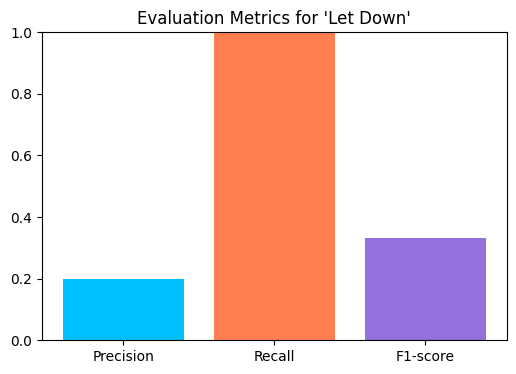

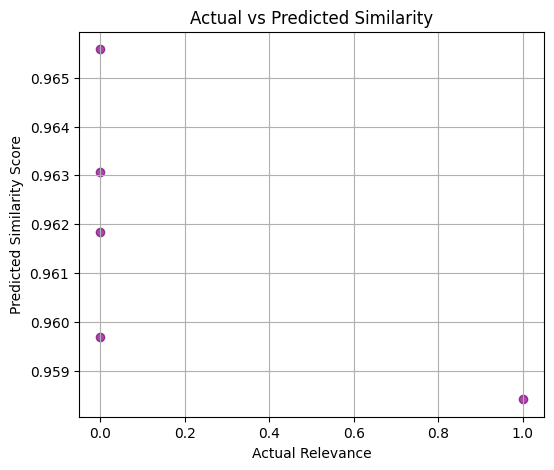

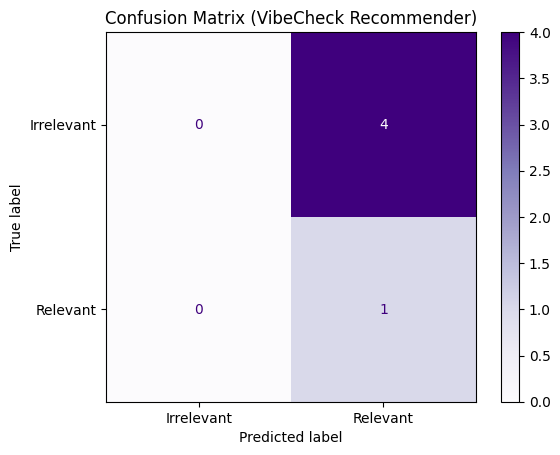

In [21]:
print("VibeCheck Recommender Evaluation\n")
song_name = input("Enter the song name: ").strip()
artist_name = input("Enter the artist name: ").strip()
k = input("Enter number of recommendations to evaluate (K): ")

try:
    k = int(k)
except:
    k = 10  # default if invalid input

evaluate_recommender(song_name, artist_name, k)